# Classify images of clothing

- Full tutorial reference: https://www.tensorflow.org/tutorials/keras/classification
- This tutorial trains a neural network to classify images of clothing.

### Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.9.1


### Import the Fashion MNIST dataset
- Fashion MNIST contains 70,000 grayscale images in 10 categories.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the format of the dataset

In [6]:
print('Train images shape:', train_images.shape) # 60,000 images with each image represented as 28x28 pixels
print('Test images shape:', test_images.shape) # 10,000 images in test set
print('Number of labels in training set:', len(train_labels))
print('Number of labels in test set:', len(test_labels))

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of labels in training set: 60000
Number of labels in test set: 10000


### Preprocess the data
- Preprocessing is an important step before training the neural network.
- Note that the pixel values fall in the range of 0 to 255, so it needs to be scaled down to a range of 0 to 1.

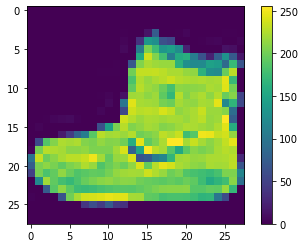

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

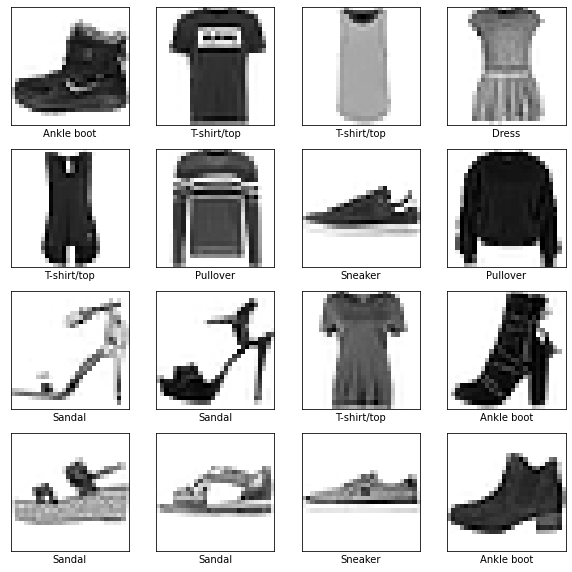

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# verify the data
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)
plt.show()   

### Build the model
- It requires configuring the layers of the model, then compiling the model.
- In compile steps:
    - Loss function: This measures how accurate the model is during training.
    - Optimizer: This is how the model is updated based on the data and its loss function.
    - Metrics: This is used to monitor the training and testing steps.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Train the model
- Training the model requires the following steps:
    1. Feed the training data to the model.
    2. Model learns to associate train images and labels.
    3. Use the model to make predictions about a test set.
    4. Verify the predictions by matching the labels from the test labels array.

In [15]:
# input data: train_images, target data: train_labels, epochs: iterations on a dataset
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1168 - accuracy: 0.6470
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6518 - accuracy: 0.7649
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5714 - accuracy: 0.7955
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5269 - accuracy: 0.8139
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4986 - accuracy: 0.8246
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4788 - accuracy: 0.8310
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4642 - accuracy: 0.8372
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4529 - accuracy: 0.8418
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4429 - accuracy: 0.8446
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.435

In [20]:
# verbose: verbosity mode, 0 = silent / 1 = progress bar / 2 = one line per epoch
test_history = model.evaluate(test_images, test_labels, verbose=2)
# test_history = [test_loss, test_accuracy]
print('\nTest accuracy:', test_history[1])

313/313 - 1s - loss: 0.4615 - accuracy: 0.8335 - 991ms/epoch - 3ms/step

Test accuracy: 0.8335000276565552


In [21]:
# Attach a softmax layer (softmax activation function) to convert the model's linear outputs (logits) to probabilities
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


### Verify predictions

In [28]:
def plot_image(i, predictions_array, true_label, true_img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(true_img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

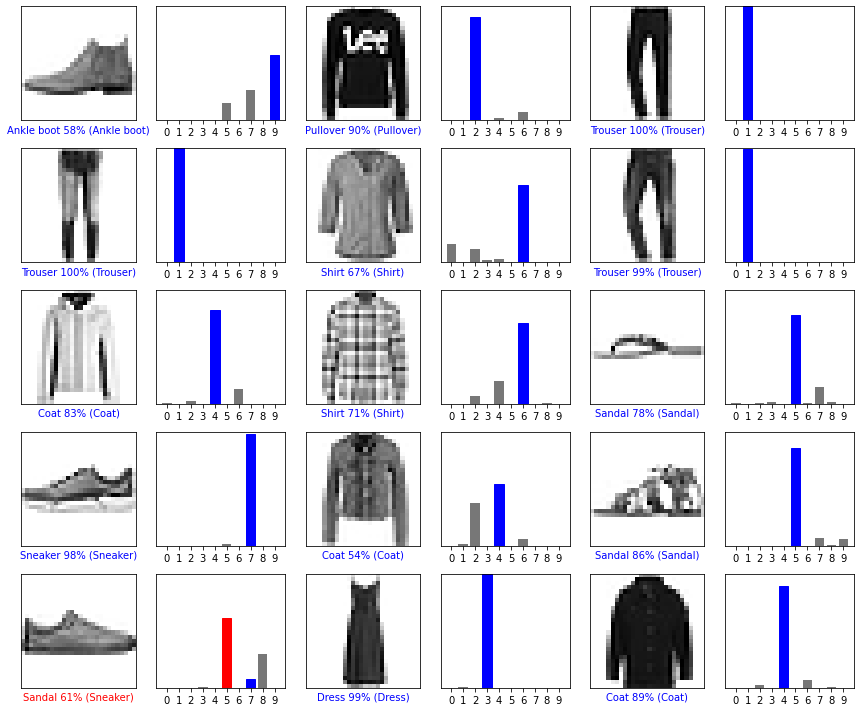

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

In [30]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.